In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xlrd

plt.rcParams['text.color'] = 'black'

from sklearn.metrics.cluster import homogeneity_score

Connection to Blob Storage

In [0]:
storage_account_name = "bsintermedio"
storage_account_access_key = "o57ZbDv+USSf+MUsNfwoZhPVcHnpkH5svcP0vMmn82Y9/6o2grl+WtEuS4Bd0rlg5/wO69NJ/aiUSsGKLXIF0w=="

spark.conf.set("fs.azure.account.key." + storage_account_name + ".blob.core.windows.net", storage_account_access_key)

CONFIRM ACCESS TO DATA

In [0]:
%fs
ls  "wasbs://blobkompras@bsintermedio.blob.core.windows.net/"

path name size wasbs://blobkompras@bsintermedio.blob.core.windows.net/OrdenesdecompraPORTAL1K.xlsx OrdenesdecompraPORTAL1K.xlsx 7927211 wasbs://blobkompras@bsintermedio.blob.core.windows.net/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv 7122583 wasbs://blobkompras@bsintermedio.blob.core.windows.net/Proveindustriales_completo.xls Proveindustriales_completo.xls 4473856 wasbs://blobkompras@bsintermedio.blob.core.windows.net/Proveindustriales_completo.xlsx Proveindustriales_completo.xlsx 1450576 wasbs://blobkompras@bsintermedio.blob.core.windows.net/Proveindustriales_completo_y_clusters.xlsx Proveindustriales_completo_y_clusters.xlsx 1515185

MOUNT UNIT DATABRICKS BLOBE STORAGE

In [0]:
#dbutils.fs.mount(                
            #    source = "wasbs://blobkompras@bsintermedio.blob.core.windows.net/",
              #  mount_point = "/mnt/data2",
              #  extra_configs =
              #  {"fs.azure.account.key.bsintermedio.blob.core.windows.net": "o57ZbDv+USSf+MUsNfwoZhPVcHnpkH5svcP0vMmn82Y9/6o2grl+WtEuS4Bd0rlg5/wO69NJ/aiUSsGKLXIF0w=="})


In [0]:
%fs
ls /mnt/data2/

path name size dbfs:/mnt/data2/OrdenesdecompraPORTAL1K.xlsx OrdenesdecompraPORTAL1K.xlsx 7927211 dbfs:/mnt/data2/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv 7122583 dbfs:/mnt/data2/Proveindustriales_completo.xls Proveindustriales_completo.xls 4473856 dbfs:/mnt/data2/Proveindustriales_completo.xlsx Proveindustriales_completo.xlsx 1450576 dbfs:/mnt/data2/Proveindustriales_completo_y_clusters.xlsx Proveindustriales_completo_y_clusters.xlsx 1515185

In [0]:
blob_container = 'blobkompras'
filePath = "wasbs://" + blob_container + "@" + storage_account_name + ".blob.core.windows.net/mnt/data/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv"
##df = spark.read.format("csv").load(filePath), inferSchema = True, header = True)


df = pd.read_csv("/dbfs/mnt/data1/Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv",sep =",")

In [0]:
##df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [0]:
df.head(2)

Out[60]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Alimentos preparados y conservados 
 SUBCATEGORÍA_Elementos de aseo y limpieza 
 SUBCATEGORÍA_Otros 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 PRESUPUESTO_Otros 
 PRESUPUESTO_Presupuesto 711 
 PRESUPUESTO_Presupuesto 719 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 PRECIO_UNITARIO_+_IVA 
 IVA 
 TOTAL_+_IVA 
 DURACIÓN_ENTREGA 
 DURACIÓN_APROBACIÓN 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.596922 
 0.031098 
 2.408839e-05 
 0.000000e+00 
 0.281401 
 0.334865 
 0.053464 
 0.669729 
 0.000000e+00 
 0.0 
 
 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.017058 
 0.000888 
 3.441947e-07 
 3.441947e-07 
 0.508366 
 0.604956 
 0.096590 
 0.604956 
 3.441947e-07 
 0.0

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 43 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 CATEGORÍA_Alimentos y Bebidas 22392 non-null float64
 1 CATEGORÍA_Almacenamiento y empaques 22392 non-null float64
 2 CATEGORÍA_Aseo, Cafetería y Oficina 22392 non-null float64
 3 CATEGORÍA_Dotación y elementos de protección personal 22392 non-null float64
 4 CATEGORÍA_Ferreteria 22392 non-null float64
 5 CATEGORÍA_Otros 22392 non-null float64
 6 CATEGORÍA_Vehículos y repuestos 22392 non-null float64
 7 CATEGORÍA_Vigilancia y seguridad industrial 22392 non-null float64
 8 SUBCATEGORÍA_Alimentos preparados y conservados 22392 non-null float64
 9 SUBCATEGORÍA_Elementos de aseo y limpieza 22392 non-null float64
 10 SUBCATEGORÍA_Otros 22392 non-null float64
 11 SUBCATEGORÍA_Seguridad y protección personal 22392 non-null float64
 12 PROVEEDOR_Otros 22392 non-null float64
 13 PROVEEDOR_Proveedor 28 22392 non-null float64
 14 PROVEEDOR_Proveedor 301 22392 non-null float64
 15 PROVEEDOR_Proveedor 59 22392 non-null float64
 16 PRESUPUESTO_Otros 22392 non-null float64
 17 PRESUPUESTO_Presupuesto 711 22392 non-null float64
 18 PRESUPUESTO_Presupuesto 719 22392 non-null float64
 19 COMPAÑÍA_COMPRADORA_Otros 22392 non-null float64
 20 COMPAÑÍA_COMPRADORA_Portal comprador 1 22392 non-null float64
 21 COMPAÑÍA_COMPRADORA_Portal comprador 2 22392 non-null float64
 22 COMPAÑÍA_COMPRADORA_Portal comprador 24 22392 non-null float64
 23 COMPAÑÍA_COMPRADORA_Portal comprador 29 22392 non-null float64
 24 ESTADO_Cancelado 22392 non-null float64
 25 ESTADO_Enviado 22392 non-null float64
 26 ESTADO_Finalizado Incompleto 22392 non-null float64
 27 ESTADO_Orden Confirmada 22392 non-null float64
 28 ESTADO_Orden Rechazada 22392 non-null float64
 29 ESTADO_Orden en Proceso 22392 non-null float64
 30 ESTADO_Pendiente por Aprobar 22392 non-null float64
 31 ESTADO_Recibido 22392 non-null float64
 32 ESTADO_Recibido Parcial 22392 non-null float64
 33 NÚMERO_PEDIDO 22392 non-null float64
 34 ORDEN_NÚMERO 22392 non-null float64
 35 CANTIDAD_PEDIDA 22392 non-null float64
 36 CANTIDAD_RECIBIDA 22392 non-null float64
 37 PRECIO_UNITARIO 22392 non-null float64
 38 PRECIO_UNITARIO_+_IVA 22392 non-null float64
 39 IVA 22392 non-null float64
 40 TOTAL_+_IVA 22392 non-null float64
 41 DURACIÓN_ENTREGA 22392 non-null float64
 42 DURACIÓN_APROBACIÓN 22392 non-null float64
dtypes: float64(43)
memory usage: 7.3 MB

## DROP SOME COLUMNS

In [0]:
cols_to_drop = ['DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN', 'PRECIO_UNITARIO_+_IVA', 
                'PRESUPUESTO_Otros', 'PRESUPUESTO_Presupuesto 711', 'PRESUPUESTO_Presupuesto 719', 
                'SUBCATEGORÍA_Alimentos preparados y conservados', 'SUBCATEGORÍA_Elementos de aseo y limpieza', 'SUBCATEGORÍA_Otros'
                
               ]

In [0]:
cols_to_drop

Out[63]: ['DURACIÓN_ENTREGA',
 'DURACIÓN_APROBACIÓN',
 'PRECIO_UNITARIO_+_IVA',
 'PRESUPUESTO_Otros',
 'PRESUPUESTO_Presupuesto 711',
 'PRESUPUESTO_Presupuesto 719',
 'SUBCATEGORÍA_Alimentos preparados y conservados',
 'SUBCATEGORÍA_Elementos de aseo y limpieza',
 'SUBCATEGORÍA_Otros']

In [0]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 34 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 CATEGORÍA_Alimentos y Bebidas 22392 non-null float64
 1 CATEGORÍA_Almacenamiento y empaques 22392 non-null float64
 2 CATEGORÍA_Aseo, Cafetería y Oficina 22392 non-null float64
 3 CATEGORÍA_Dotación y elementos de protección personal 22392 non-null float64
 4 CATEGORÍA_Ferreteria 22392 non-null float64
 5 CATEGORÍA_Otros 22392 non-null float64
 6 CATEGORÍA_Vehículos y repuestos 22392 non-null float64
 7 CATEGORÍA_Vigilancia y seguridad industrial 22392 non-null float64
 8 SUBCATEGORÍA_Seguridad y protección personal 22392 non-null float64
 9 PROVEEDOR_Otros 22392 non-null float64
 10 PROVEEDOR_Proveedor 28 22392 non-null float64
 11 PROVEEDOR_Proveedor 301 22392 non-null float64
 12 PROVEEDOR_Proveedor 59 22392 non-null float64
 13 COMPAÑÍA_COMPRADORA_Otros 22392 non-null float64
 14 COMPAÑÍA_COMPRADORA_Portal comprador 1 22392 non-null float64
 15 COMPAÑÍA_COMPRADORA_Portal comprador 2 22392 non-null float64
 16 COMPAÑÍA_COMPRADORA_Portal comprador 24 22392 non-null float64
 17 COMPAÑÍA_COMPRADORA_Portal comprador 29 22392 non-null float64
 18 ESTADO_Cancelado 22392 non-null float64
 19 ESTADO_Enviado 22392 non-null float64
 20 ESTADO_Finalizado Incompleto 22392 non-null float64
 21 ESTADO_Orden Confirmada 22392 non-null float64
 22 ESTADO_Orden Rechazada 22392 non-null float64
 23 ESTADO_Orden en Proceso 22392 non-null float64
 24 ESTADO_Pendiente por Aprobar 22392 non-null float64
 25 ESTADO_Recibido 22392 non-null float64
 26 ESTADO_Recibido Parcial 22392 non-null float64
 27 NÚMERO_PEDIDO 22392 non-null float64
 28 ORDEN_NÚMERO 22392 non-null float64
 29 CANTIDAD_PEDIDA 22392 non-null float64
 30 CANTIDAD_RECIBIDA 22392 non-null float64
 31 PRECIO_UNITARIO 22392 non-null float64
 32 IVA 22392 non-null float64
 33 TOTAL_+_IVA 22392 non-null float64
dtypes: float64(34)
memory usage: 5.8 MB

In [0]:
df.head(3)

Out[66]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.596922 
 0.031098 
 2.408839e-05 
 0.000000e+00 
 0.281401 
 0.053464 
 0.669729 
 
 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.017058 
 0.000888 
 3.441947e-07 
 3.441947e-07 
 0.508366 
 0.096590 
 0.604956 
 
 
 2 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.301784 
 0.015711 
 6.089387e-05 
 0.000000e+00 
 0.094386 
 0.000000 
 0.943855

# CLUSTERING

In [0]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [0]:
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Out[69]:

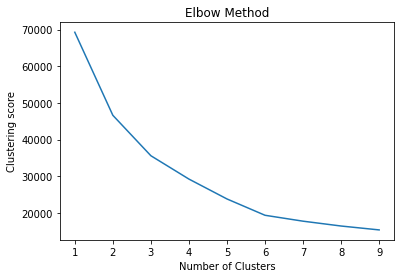

Text(0, 0.5, 'Clustering score')

In [0]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [0]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(df)


Out[70]: KMeans(n_clusters=3)

In [0]:
df.head()

Out[71]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.596922 
 0.031098 
 2.408839e-05 
 0.000000e+00 
 0.281401 
 0.053464 
 0.669729 
 
 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.017058 
 0.000888 
 3.441947e-07 
 3.441947e-07 
 0.508366 
 0.096590 
 0.604956 
 
 
 2 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.301784 
 0.015711 
 6.089387e-05 
 0.000000e+00 
 0.094386 
 0.000000 
 0.943855 
 
 
 3 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.044989 
 0.001718 
 4.539030e-05 
 0.000000e+00 
 0.019972 
 0.000000 
 0.998587 
 
 
 4 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.063367 
 0.000001 
 8.950629e-06 
 8.950629e-06 
 0.117744 
 0.022371 
 0.980810

## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [0]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

Out[72]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 
 
 
 
 0 
 4.662937e-15 
 -5.898060e-17 
 -6.938894e-16 
 2.289835e-15 
 -2.206568e-15 
 -3.302913e-15 
 -6.730727e-16 
 1.000000 
 1.000000 
 0.000735 
 5.828671e-16 
 9.992651e-01 
 -1.984524e-15 
 0.000735 
 -1.115774e-14 
 -1.204592e-14 
 9.992651e-01 
 1.582068e-15 
 2.074729e-15 
 4.228388e-18 
 5.828671e-16 
 -3.892286e-17 
 -2.560452e-15 
 -1.065814e-14 
 5.681219e-17 
 1.000000 
 4.562323e-16 
 0.185118 
 0.002143 
 0.000086 
 0.000086 
 0.117362 
 0.022292 
 0.904868 
 
 
 1 
 7.438825e-01 
 3.512779e-02 
 4.926591e-02 
 9.657423e-02 
 1.305057e-03 
 6.264274e-02 
 6.090266e-03 
 0.005111 
 0.005111 
 0.999456 
 3.262643e-04 
 -3.580469e-15 
 2.175095e-04 
 0.256987 
 5.437738e-03 
 3.765090e-01 
 -3.580469e-15 
 3.610658e-01 
 7.025557e-02 
 1.196302e-03 
 3.882545e-02 
 1.631321e-03 
 6.492659e-02 
 4.929853e-01 
 3.262643e-03 
 0.313322 
 1.359434e-02 
 0.214709 
 0.008044 
 0.002048 
 0.000069 
 0.106715 
 0.015012 
 0.858628 
 
 
 2 
 1.263864e-02 
 1.792623e-02 
 4.365489e-01 
 4.010833e-02 
 1.003353e-01 
 2.802425e-01 
 4.010833e-02 
 0.072092 
 0.071576 
 0.617488 
 1.826154e-01 
 -9.631185e-15 
 1.998968e-01 
 0.108331 
 8.399536e-01 
 5.171524e-02 
 -9.631185e-15 
 -5.939693e-15 
 6.358009e-02 
 1.289657e-04 
 7.467114e-02 
 -1.539567e-17 
 5.352076e-02 
 4.371937e-02 
 2.708280e-03 
 0.756771 
 4.900696e-03 
 0.613474 
 0.013523 
 0.000300 
 0.000279 
 0.192530 
 0.026295 
 0.501093

# DF WITH LABELS OF CLUSTER

In [0]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

Out[73]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 KMeans_Cluster 
 
 
 
 
 5850 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.418738 
 0.011349 
 2.651642e-05 
 0.000000 
 0.232929 
 0.044256 
 0.831555 
 2 
 
 
 19788 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.002030 
 0.000950 
 4.873151e-04 
 0.000000 
 0.004667 
 0.000888 
 0.999971 
 1 
 
 
 211 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.165434 
 0.008359 
 3.345006e-06 
 0.000003 
 0.501416 
 0.095269 
 0.596685 
 2 
 
 
 8470 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.516273 
 0.008535 
 6.668325e-05 
 0.000067 
 0.138923 
 0.000000 
 0.833541 
 2 
 
 
 2632 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.348423 
 0.012035 
 2.877565e-05 
 0.000029 
 0.187042 
 0.035538 
 0.890319 
 1 
 
 
 1260 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.876860 
 0.039568 
 8.943901e-03 
 0.008944 
 0.000805 
 0.000161 
 0.478946 
 2 
 
 
 7450 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.009372 
 0.000030 
 2.001578e-07 
 0.000000 
 0.522151 
 0.078323 
 0.600473 
 1

In [0]:
df

Out[74]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 KMeans_Cluster 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.596922 
 0.031098 
 2.408839e-05 
 0.000000e+00 
 0.281401 
 0.053464 
 0.669729 
 2 
 
 
 1 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.017058 
 0.000888 
 3.441947e-07 
 3.441947e-07 
 0.508366 
 0.096590 
 0.604956 
 2 
 
 
 2 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.301784 
 0.015711 
 6.089387e-05 
 0.000000e+00 
 0.094386 
 0.000000 
 0.943855 
 1 
 
 
 3 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.044989 
 0.001718 
 4.539030e-05 
 0.000000e+00 
 0.019972 
 0.000000 
 0.998587 
 1 
 
 
 4 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.063367 
 0.000001 
 8.950629e-06 
 8.950629e-06 
 0.117744 
 0.022371 
 0.980810 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.000006 
 0.000006 
 2.466850e-05 
 2.466850e-05 
 0.103648 
 0.019695 
 0.986740 
 2 
 
 
 22388 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.001729 
 0.001729 
 8.644139e-04 
 8.644139e-04 
 0.508275 
 0.096814 
 0.605090 
 2 
 
 
 22389 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.000017 
 0.000017 
 2.616493e-05 
 2.616493e-05 
 0.256521 
 0.048737 
 0.915773 
 1 
 
 
 22390 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.000007 
 0.000007 
 2.714046e-05 
 2.714046e-05 
 0.199564 
 0.037915 
 0.949916 
 1 
 
 
 22391 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.000005 
 0.000005 
 2.417671e-05 
 2.417671e-05 
 0.162530 
 0.030883 
 0.967068 
 2 
 
 
 
 22392 rows × 35 columns

## BRING THE ORIGINAL DF TO ADD CLUSTER LABELS

In [0]:
df_original = pd.read_excel('/dbfs/mnt/data1/Proveindustriales_completo.xls')


In [0]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original['KMeans_Cluster'] = df_original['KMeans_Cluster'].map({0:'Plata_Alim_$_medios', 1:'Oro_Vig_y_Seg_$_altos', 2:'Bronce_Aseo_$_bajos'})
df_original_plus_clusters = df_original
df_original.sample(n=7)

Out[77]:

NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CATEGORÍA 
 SUBCATEGORÍA 
 PROVEEDOR 
 PRESUPUESTO 
 COMPAÑÍA_COMPRADORA 
 ESTADO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 PRECIO_UNITARIO_+_IVA 
 IVA 
 TOTAL_+_IVA 
 FECHA_ÚLTIMO_MOVIMIENTO 
 DURACIÓN_ENTREGA 
 DURACIÓN_APROBACIÓN 
 KMeans_Cluster 
 
 
 
 
 18043 
 31359 
 15 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Otros 
 Portal comprador 24 
 Recibido 
 10.0 
 10.0 
 24822 
 29538 
 4716 
 295379 
 2020-01-24 
 0.000000 
 64.0 
 Plata_Alim_$_medios 
 
 
 8419 
 46471 
 952 
 Alimentos y Bebidas 
 Otros 
 Otros 
 Presupuesto 711 
 Portal comprador 2 
 Recibido 
 1.0 
 1.0 
 128151 
 152500 
 24349 
 152500 
 2021-03-02 
 1.000000 
 0.0 
 Oro_Vig_y_Seg_$_altos 
 
 
 13452 
 38998 
 899 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Otros 
 Portal comprador 24 
 Recibido 
 1.0 
 1.0 
 86554 
 102999 
 16445 
 102999 
 2020-02-13 
 0.000000 
 10.0 
 Plata_Alim_$_medios 
 
 
 21046 
 420 
 178 
 Aseo, Cafetería y Oficina 
 Otros 
 Otros 
 Presupuesto 711 
 Portal comprador 29 
 Orden en Proceso 
 900.0 
 0.0 
 42 
 50 
 8 
 45000 
 2018-08-02 
 3.241622 
 0.0 
 Oro_Vig_y_Seg_$_altos 
 
 
 21015 
 428 
 183 
 Alimentos y Bebidas 
 Otros 
 Otros 
 Presupuesto 711 
 Portal comprador 29 
 Orden en Proceso 
 144.0 
 0.0 
 735 
 875 
 140 
 126000 
 2018-08-04 
 3.241622 
 0.0 
 Oro_Vig_y_Seg_$_altos 
 
 
 16796 
 32392 
 152 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Presupuesto 719 
 Portal comprador 24 
 Recibido 
 23.0 
 23.0 
 3378 
 4020 
 642 
 92460 
 2020-01-24 
 0.000000 
 55.0 
 Plata_Alim_$_medios 
 
 
 18845 
 925 
 493 
 Alimentos y Bebidas 
 Otros 
 Otros 
 Presupuesto 711 
 Portal comprador 29 
 Orden en Proceso 
 432.0 
 0.0 
 399 
 475 
 76 
 205200 
 2018-12-04 
 3.241622 
 0.0 
 Oro_Vig_y_Seg_$_altos

## DESCRIBING THE CLUSTER

In [0]:
df_original.groupby('KMeans_Cluster').agg(
    {
    'KMeans_Cluster': 'count',    
    'CATEGORÍA':  lambda x: x.value_counts().index[0],
    'SUBCATEGORÍA': lambda x: x.value_counts().index[0],
    'PROVEEDOR': lambda x: x.value_counts().index[0],
    'PRESUPUESTO': lambda x: x.value_counts().index[0],  
    'ESTADO': lambda x: x.value_counts().index[0],  
    'CANTIDAD_PEDIDA': ['mean', 'sum'],
    'CANTIDAD_RECIBIDA': ['sum','mean'],
    'PRECIO_UNITARIO': ['sum','mean'],
    'TOTAL_+_IVA': 'sum',
    'CANTIDAD_PEDIDA': 'sum'
    })

Out[78]:

KMeans_Cluster 
 CATEGORÍA 
 SUBCATEGORÍA 
 PROVEEDOR 
 PRESUPUESTO 
 ESTADO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 TOTAL_+_IVA 
 
 
 
 count 
 <lambda> 
 <lambda> 
 <lambda> 
 <lambda> 
 <lambda> 
 sum 
 sum 
 mean 
 sum 
 mean 
 sum 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Bronce_Aseo_$_bajos 
 7760 
 Aseo, Cafetería y Oficina 
 Otros 
 Otros 
 Otros 
 Recibido 
 465661.20 
 447823.30 
 57.709188 
 1172263388 
 151064.869588 
 3238739749 
 
 
 Oro_Vig_y_Seg_$_altos 
 9189 
 Alimentos y Bebidas 
 Otros 
 Otros 
 Presupuesto 711 
 Orden en Proceso 
 3707185.43 
 429896.76 
 46.783846 
 269180284 
 29293.751660 
 4014919988 
 
 
 Plata_Alim_$_medios 
 5443 
 Vigilancia y seguridad industrial 
 Seguridad y protección personal 
 Proveedor 301 
 Otros 
 Recibido 
 231201.00 
 231201.00 
 42.476759 
 217250633 
 39913.766857 
 5113057930

In [0]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index')

Out[79]:

CATEGORÍA 
 Alimentos y Bebidas 
 Almacenamiento y empaques 
 Aseo, Cafetería y Oficina 
 Dotación y elementos de protección personal 
 Ferreteria 
 Otros 
 Vehículos y repuestos 
 Vigilancia y seguridad industrial 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 Bronce_Aseo_$_bajos 
 0.013015 
 0.018041 
 0.436211 
 0.040206 
 0.100258 
 0.280155 
 0.040077 
 0.072036 
 
 
 Oro_Vig_y_Seg_$_altos 
 0.744042 
 0.035042 
 0.049298 
 0.096528 
 0.001306 
 0.062575 
 0.006094 
 0.005115 
 
 
 Plata_Alim_$_medios 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 All 
 0.309843 
 0.020632 
 0.171401 
 0.053546 
 0.035280 
 0.122767 
 0.016390 
 0.270141

In [0]:
df_original.columns

Out[80]: Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
 'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
 'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN',
 'KMeans_Cluster'],
 dtype='object')

# STATISTICAL CLUSTER DESCRIPTION

## QUANTITY OF CLUSTERS

In [0]:
df_original['KMeans_Cluster'].value_counts()

Out[81]: Oro_Vig_y_Seg_$_altos 9189
Bronce_Aseo_$_bajos 7760
Plata_Alim_$_medios 5443
Name: KMeans_Cluster, dtype: int64

Out[82]:

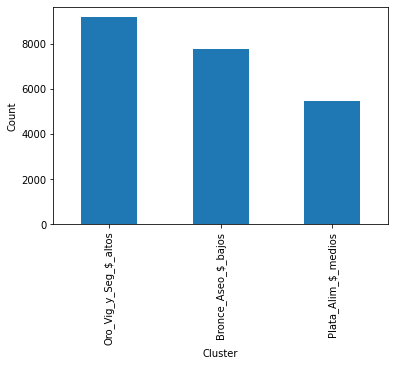

Text(0.5, 0, 'Cluster')

In [0]:
df_original['KMeans_Cluster'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Cluster')

## GROUPBY CLUSTERS-ESTADO

In [0]:
df_orinigal_estado = df_original.groupby('KMeans_Cluster')['ESTADO'].value_counts()
df_orinigal_estado

Out[83]: KMeans_Cluster ESTADO 
Bronce_Aseo_$_bajos Recibido 5873
 Finalizado Incompleto 579
 Cancelado 493
 Orden Rechazada 416
 Orden en Proceso 339
 Recibido Parcial 38
 Pendiente por Aprobar 21
 Enviado 1
Oro_Vig_y_Seg_$_altos Orden en Proceso 4533
 Recibido 2876
 Cancelado 646
 Orden Rechazada 596
 Finalizado Incompleto 357
 Recibido Parcial 125
 Pendiente por Aprobar 30
 Orden Confirmada 15
 Enviado 11
Plata_Alim_$_medios Recibido 5443
Name: ESTADO, dtype: int64

In [0]:
plt.style.use('default')

Out[85]:

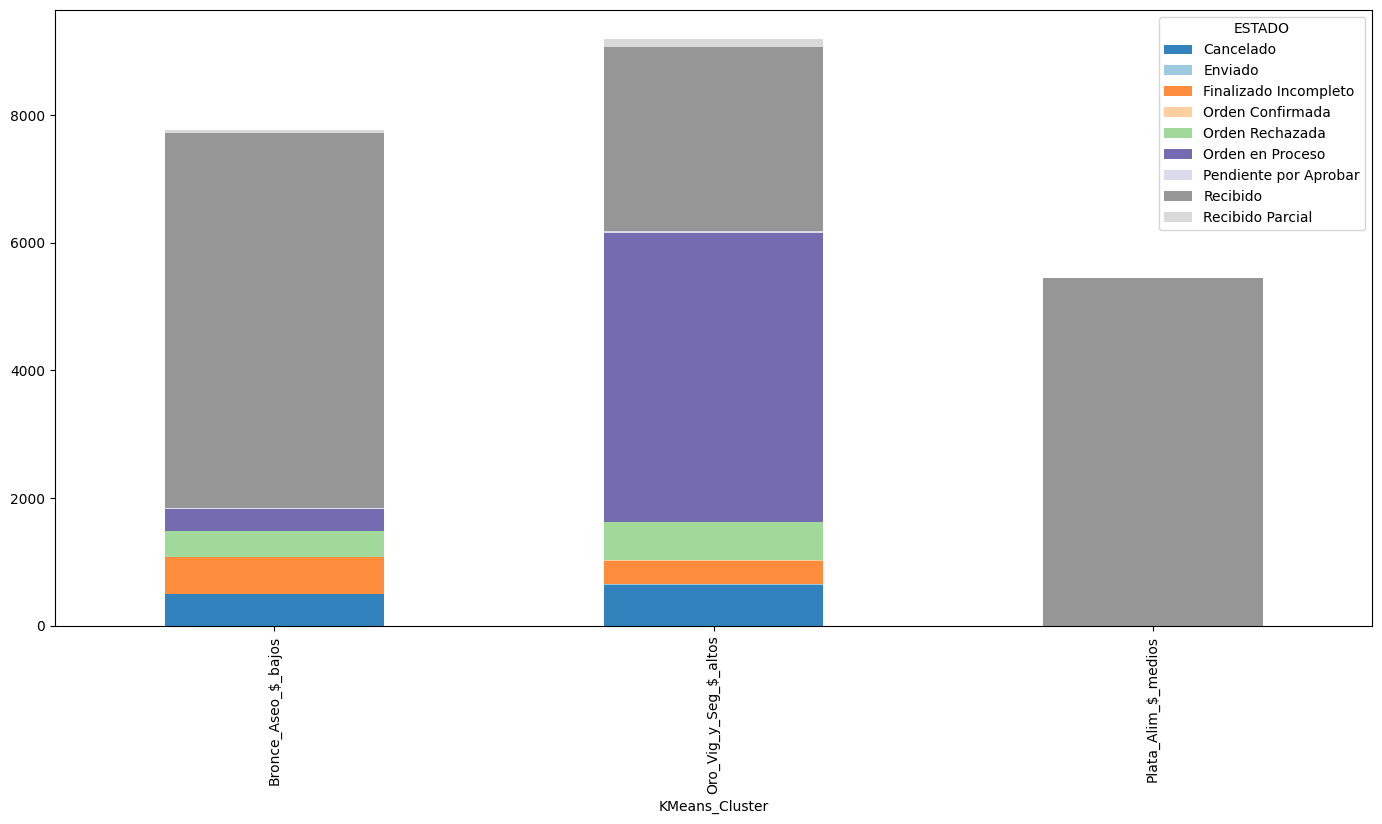

<matplotlib.axes._subplots.AxesSubplot at 0x7fec6c3691f0>

In [0]:
df_orinigal_estado.unstack().plot(kind='bar', stacked=True, figsize=(17,8),cmap=plt.get_cmap('tab20c'))

In [0]:
df_orinigal_estado1 = df_original.groupby('ESTADO')['KMeans_Cluster'].value_counts()
df_orinigal_estado1

Out[86]: ESTADO KMeans_Cluster 
Cancelado Oro_Vig_y_Seg_$_altos 646
 Bronce_Aseo_$_bajos 493
Enviado Oro_Vig_y_Seg_$_altos 11
 Bronce_Aseo_$_bajos 1
Finalizado Incompleto Bronce_Aseo_$_bajos 579
 Oro_Vig_y_Seg_$_altos 357
Orden Confirmada Oro_Vig_y_Seg_$_altos 15
Orden Rechazada Oro_Vig_y_Seg_$_altos 596
 Bronce_Aseo_$_bajos 416
Orden en Proceso Oro_Vig_y_Seg_$_altos 4533
 Bronce_Aseo_$_bajos 339
Pendiente por Aprobar Oro_Vig_y_Seg_$_altos 30
 Bronce_Aseo_$_bajos 21
Recibido Bronce_Aseo_$_bajos 5873
 Plata_Alim_$_medios 5443
 Oro_Vig_y_Seg_$_altos 2876
Recibido Parcial Oro_Vig_y_Seg_$_altos 125
 Bronce_Aseo_$_bajos 38
Name: KMeans_Cluster, dtype: int64

Out[87]:

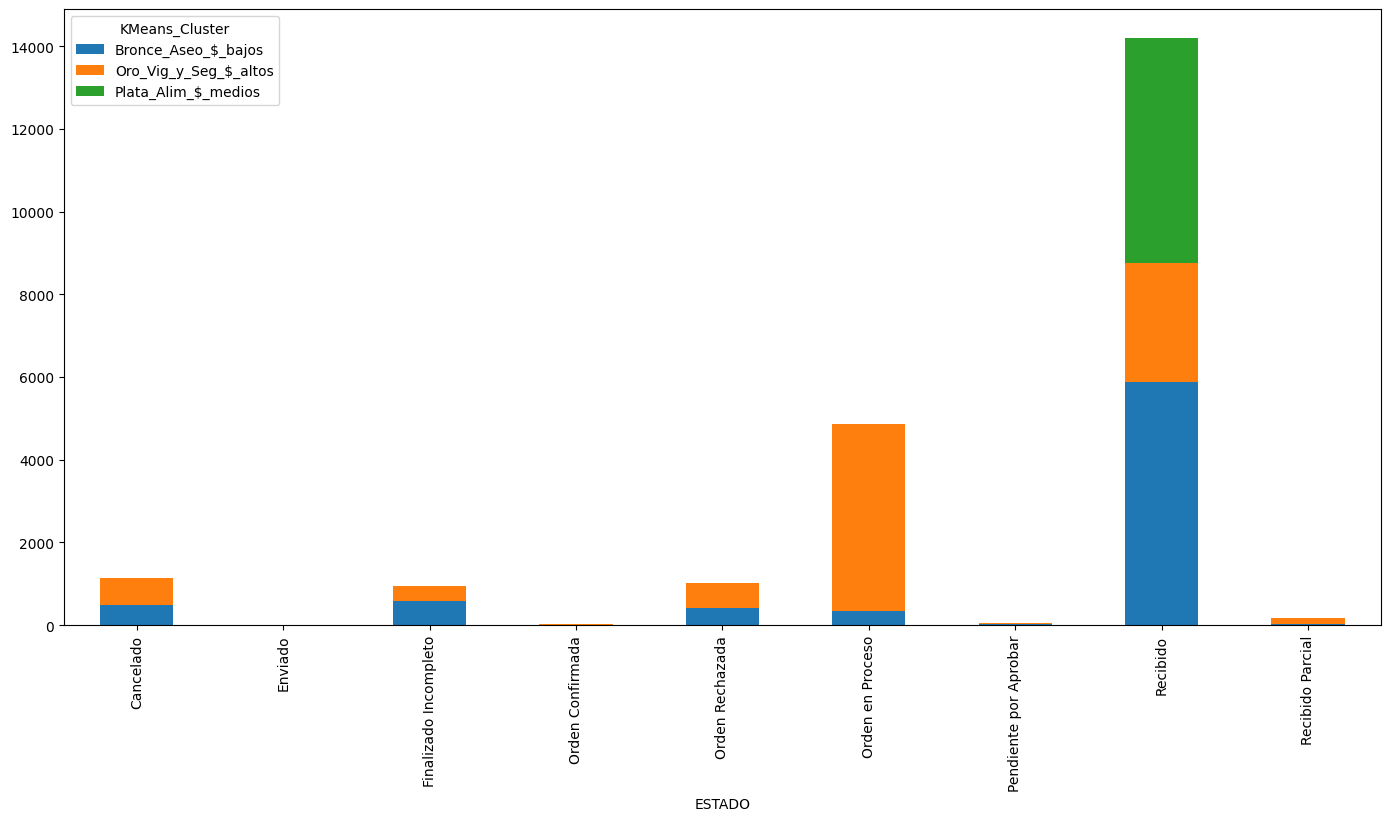

<matplotlib.axes._subplots.AxesSubplot at 0x7fec55148bb0>

In [0]:
df_orinigal_estado1.unstack().plot(kind='bar', stacked=True, figsize=(17,8))

## GROUPBY CLUSTERS-TOTAL+IVA

In [0]:
df_original.groupby('KMeans_Cluster').agg({'TOTAL_+_IVA':['mean', 'sum']})

Out[88]:

TOTAL_+_IVA 
 
 
 
 mean 
 sum 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 Bronce_Aseo_$_bajos 
 417363.369716 
 3238739749 
 
 
 Oro_Vig_y_Seg_$_altos 
 436926.758951 
 4014919988 
 
 
 Plata_Alim_$_medios 
 939382.313063 
 5113057930

Out[89]:

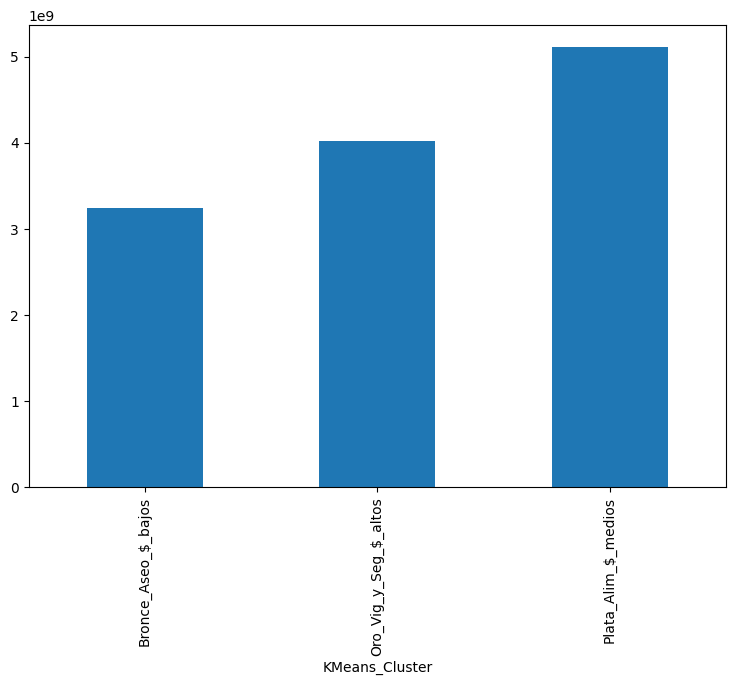

<matplotlib.axes._subplots.AxesSubplot at 0x7fec54d15c70>

In [0]:
df_original.groupby('KMeans_Cluster')['TOTAL_+_IVA'].sum().plot(kind='bar', stacked=True, figsize=(9,6))

## GROUPBY CLUSTER-QUANTITY "PROVEEDORES"

Out[90]:

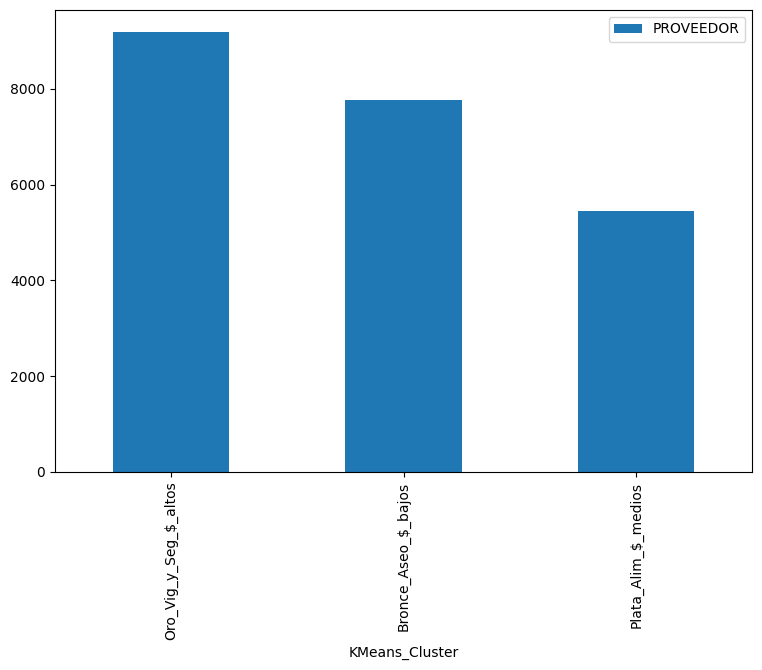

<matplotlib.axes._subplots.AxesSubplot at 0x7fec56e3ffd0>

In [0]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

In [0]:
df_original.columns

Out[91]: Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
 'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
 'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN',
 'KMeans_Cluster'],
 dtype='object')

## GROUPBY CLUSTER-COMPANHIA COMPRADORA

Out[92]:

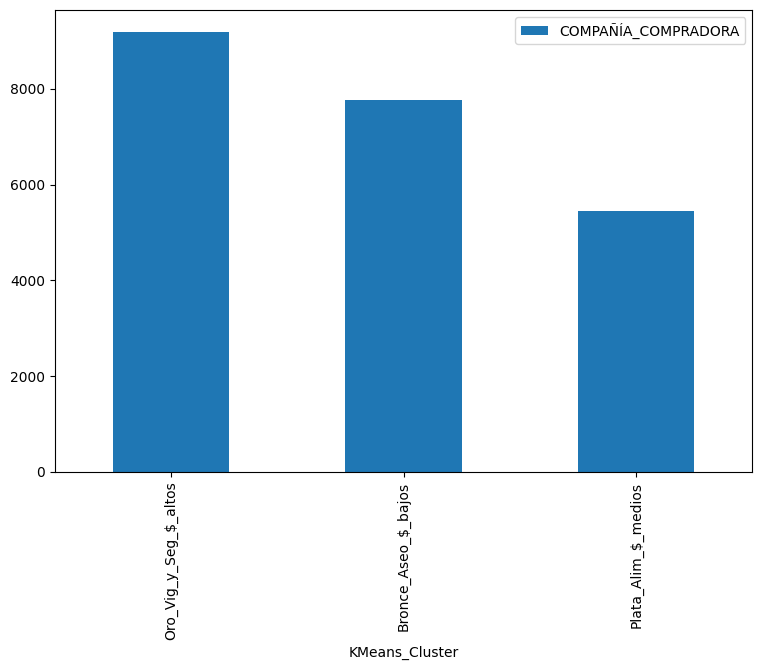

<matplotlib.axes._subplots.AxesSubplot at 0x7fec55bc36a0>

In [0]:
df_original.groupby('KMeans_Cluster').agg({'COMPAÑÍA_COMPRADORA':'count'}).sort_values(by='COMPAÑÍA_COMPRADORA',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

In [0]:
df_original.groupby('KMeans_Cluster')['COMPAÑÍA_COMPRADORA'].value_counts().unstack()

Out[93]:

COMPAÑÍA_COMPRADORA 
 Otros 
 Portal comprador 1 
 Portal comprador 2 
 Portal comprador 24 
 Portal comprador 29 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 Bronce_Aseo_$_bajos 
 842.0 
 6516.0 
 402.0 
 NaN 
 NaN 
 
 
 Oro_Vig_y_Seg_$_altos 
 2361.0 
 47.0 
 3461.0 
 NaN 
 3320.0 
 
 
 Plata_Alim_$_medios 
 4.0 
 NaN 
 NaN 
 5439.0 
 NaN

Out[94]:

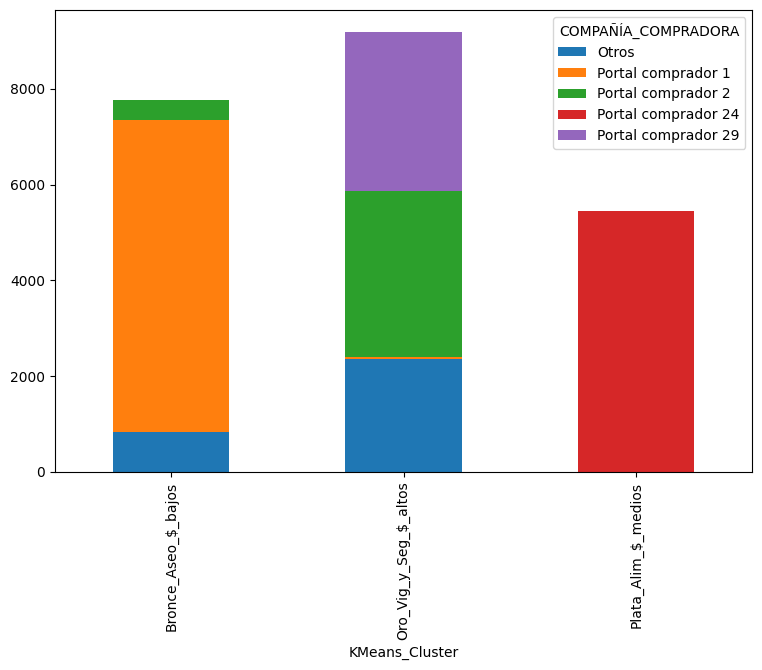

<matplotlib.axes._subplots.AxesSubplot at 0x7fec7165dfa0>

In [0]:
df_original.groupby('KMeans_Cluster')['COMPAÑÍA_COMPRADORA'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,6))

## GROUPBY CLUSTER-COMPANHIA PROVEEDOR

Out[95]:

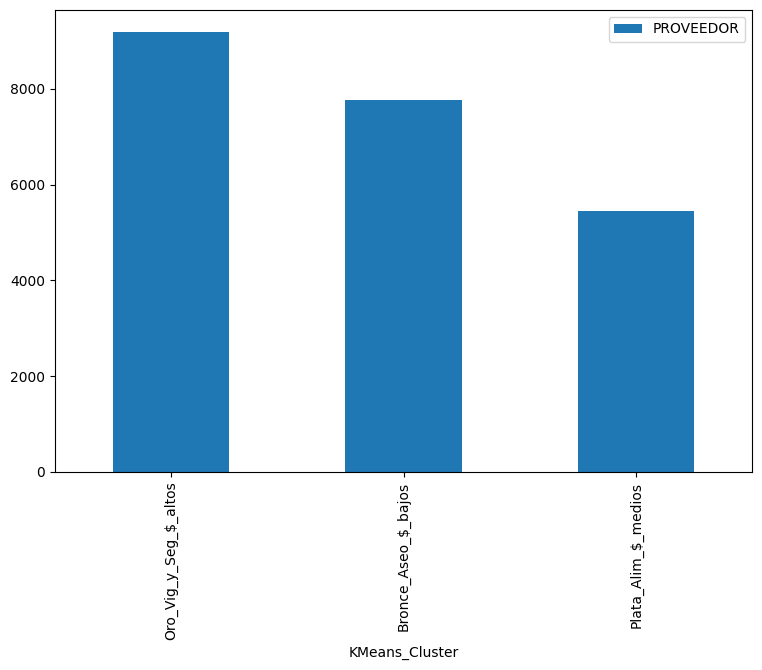

<matplotlib.axes._subplots.AxesSubplot at 0x7fec557eb280>

In [0]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

Out[96]:

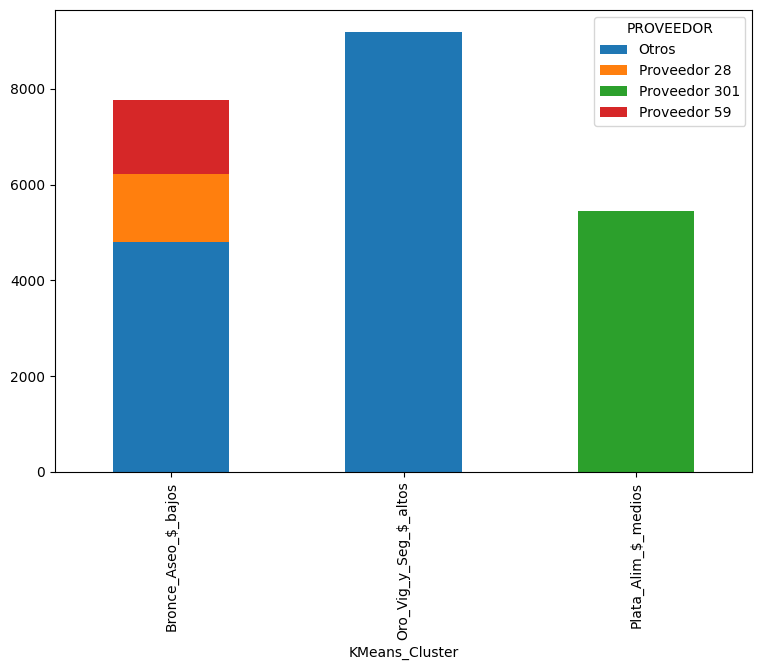

<matplotlib.axes._subplots.AxesSubplot at 0x7fec57306910>

In [0]:
df_original.groupby('KMeans_Cluster')['PROVEEDOR'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,6))

Out[97]:

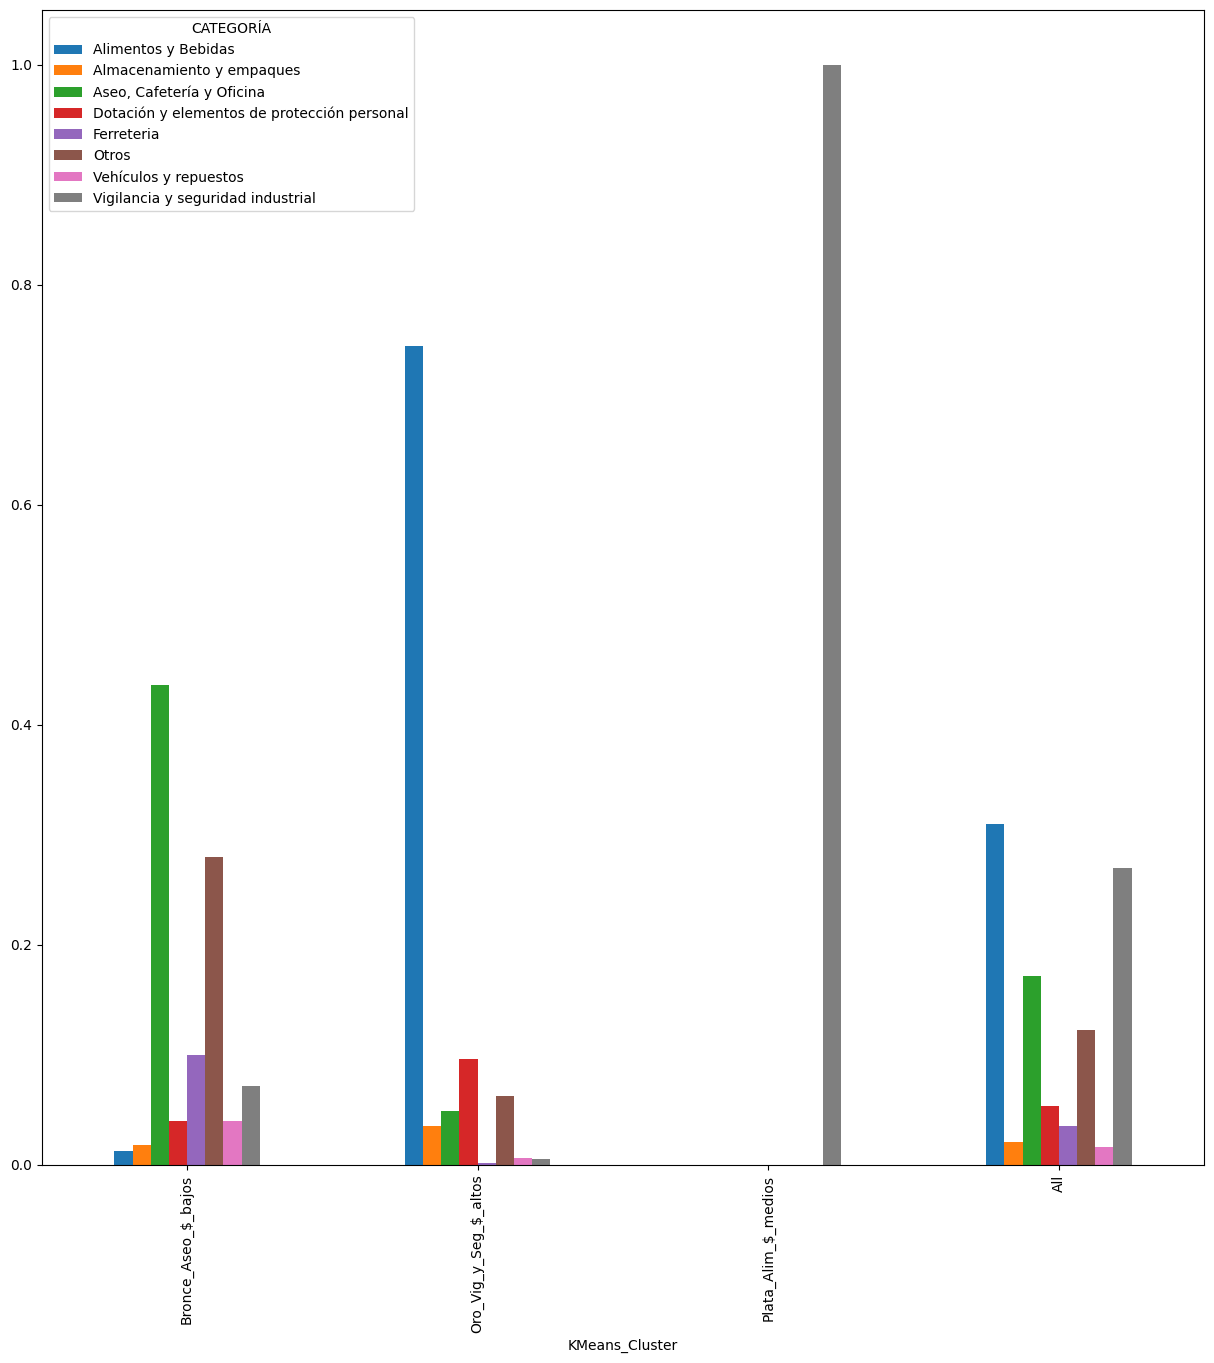

<matplotlib.axes._subplots.AxesSubplot at 0x7fec574e6bb0>

In [0]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index').plot(kind='bar', figsize=(15,15), )

Out[98]:

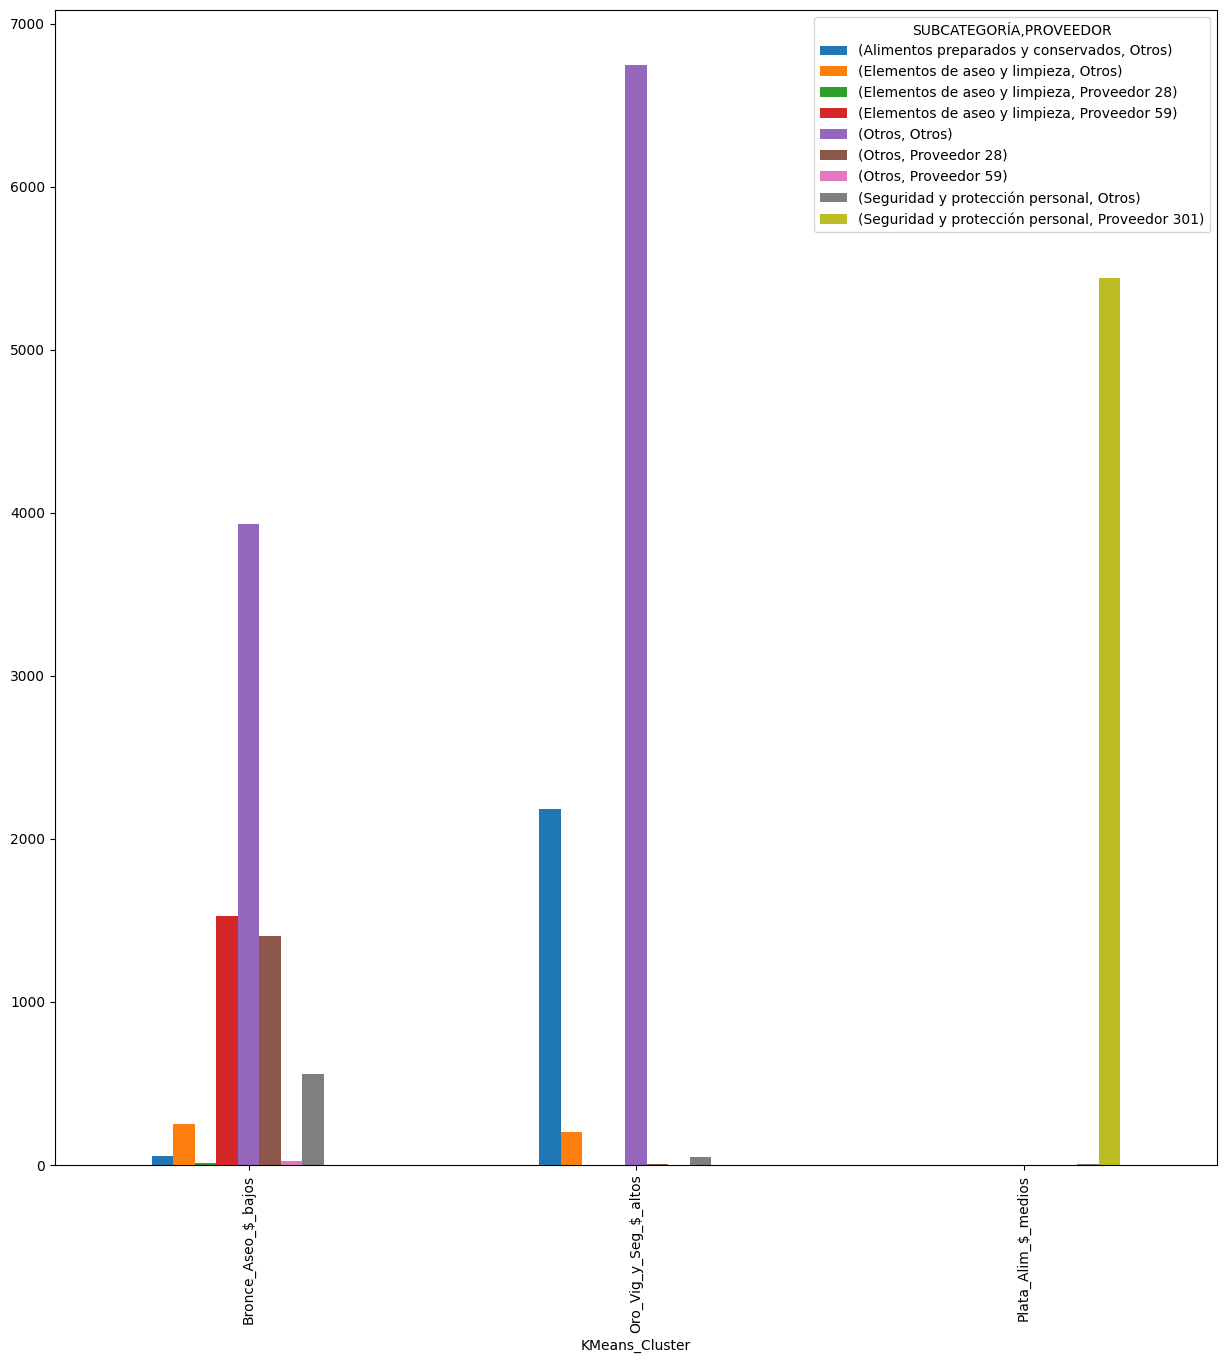

<matplotlib.axes._subplots.AxesSubplot at 0x7fec572b0730>

In [0]:
pd.crosstab(df_original['KMeans_Cluster'], [df_original['SUBCATEGORÍA'] , df_original['PROVEEDOR']]).plot(kind='bar', figsize=(15,15))

In [0]:
df_original_plus_clusters.to_excel('/dbfs/mnt/data1/Proveindustriales_completo_y_clusters1.xls', index=False)

In [0]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 18 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 NÚMERO_PEDIDO 22392 non-null int64 
 1 ORDEN_NÚMERO 22392 non-null int64 
 2 CATEGORÍA 22392 non-null object 
 3 SUBCATEGORÍA 22392 non-null object 
 4 PROVEEDOR 22392 non-null object 
 5 PRESUPUESTO 22392 non-null object 
 6 COMPAÑÍA_COMPRADORA 22392 non-null object 
 7 ESTADO 22392 non-null object 
 8 CANTIDAD_PEDIDA 22392 non-null float64 
 9 CANTIDAD_RECIBIDA 22392 non-null float64 
 10 PRECIO_UNITARIO 22392 non-null int64 
 11 PRECIO_UNITARIO_+_IVA 22392 non-null int64 
 12 IVA 22392 non-null int64 
 13 TOTAL_+_IVA 22392 non-null int64 
 14 FECHA_ÚLTIMO_MOVIMIENTO 22392 non-null datetime64[ns]
 15 DURACIÓN_ENTREGA 22392 non-null float64 
 16 DURACIÓN_APROBACIÓN 22392 non-null float64 
 17 KMeans_Cluster 22392 non-null object 
dtypes: datetime64[ns](1), float64(4), int64(6), object(7)
memory usage: 3.1+ MB

In [0]:
df_original.select_dtypes(['float', 'int', 'int64', 'float64', 'int32']).columns

Out[132]: Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN'],
 dtype='object')

In [0]:
df1 = df_original

In [0]:
df1

Out[134]:

NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CATEGORÍA 
 SUBCATEGORÍA 
 PROVEEDOR 
 PRESUPUESTO 
 COMPAÑÍA_COMPRADORA 
 ESTADO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 PRECIO_UNITARIO_+_IVA 
 IVA 
 TOTAL_+_IVA 
 FECHA_ÚLTIMO_MOVIMIENTO 
 DURACIÓN_ENTREGA 
 DURACIÓN_APROBACIÓN 
 KMeans_Cluster 
 
 
 
 
 0 
 49561 
 2582 
 Otros 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 2.00 
 0.00 
 23364 
 27803 
 4439 
 55606 
 2021-11-10 
 0.00 
 0.00 
 Bronce_Aseo_$_bajos 
 
 
 1 
 49560 
 2581 
 Otros 
 Otros 
 Otros 
 Otros 
 Portal comprador 1 
 Recibido 
 1.00 
 1.00 
 1476972 
 1757597 
 280625 
 1757597 
 2021-11-10 
 1.00 
 0.00 
 Bronce_Aseo_$_bajos 
 
 
 2 
 49559 
 2580 
 Alimentos y Bebidas 
 Alimentos preparados y conservados 
 Otros 
 Otros 
 Portal comprador 1 
 Orden en Proceso 
 10.00 
 0.00 
 15500 
 15500 
 0 
 155000 
 2021-11-10 
 0.00 
 0.00 
 Oro_Vig_y_Seg_$_altos 
 
 
 3 
 49558 
 1892 
 Alimentos y Bebidas 
 Otros 
 Otros 
 Otros 
 Portal comprador 2 
 Orden en Proceso 
 50.00 
 0.00 
 22000 
 22000 
 0 
 1100000 
 2021-11-10 
 2.00 
 0.00 
 Oro_Vig_y_Seg_$_altos 
 
 
 4 
 49557 
 1 
 Otros 
 Otros 
 Otros 
 Presupuesto 711 
 Otros 
 Recibido 
 7.00 
 7.00 
 92084 
 109580 
 17496 
 767060 
 2021-11-10 
 -1.00 
 0.00 
 Oro_Vig_y_Seg_$_altos 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 2 
 2 
 Aseo, Cafetería y Oficina 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 8.00 
 8.00 
 33613 
 40000 
 6387 
 320000 
 2018-05-01 
 3.24 
 1.00 
 Bronce_Aseo_$_bajos 
 
 
 22388 
 2 
 2 
 Aseo, Cafetería y Oficina 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 1.00 
 1.00 
 588 
 700 
 112 
 700 
 2018-05-01 
 3.24 
 1.00 
 Bronce_Aseo_$_bajos 
 
 
 22389 
 2 
 2 
 Otros 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 3.00 
 3.00 
 29412 
 35000 
 5588 
 105000 
 2018-05-01 
 3.24 
 1.00 
 Oro_Vig_y_Seg_$_altos 
 
 
 22390 
 1 
 1 
 Otros 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 4.00 
 4.00 
 29412 
 35000 
 5588 
 140000 
 2018-05-01 
 3.24 
 0.00 
 Oro_Vig_y_Seg_$_altos 
 
 
 22391 
 1 
 1 
 Aseo, Cafetería y Oficina 
 Otros 
 Otros 
 Otros 
 Otros 
 Recibido 
 5.00 
 5.00 
 33613 
 40000 
 6387 
 200000 
 2018-05-01 
 3.24 
 0.00 
 Bronce_Aseo_$_bajos 
 
 
 
 22392 rows × 18 columns

In [0]:

px.parallel_coordinates(df1, labels={"KMeans_Cluster": "clusters",
                   "CANTIDAD_PEDIDA": "CANTIDAD_PEDIDA", "CANTIDAD_RECIBIDA": "CANTIDAD_RECIBIDA",
                   "PRECIO_UNITARIO": "PRECIO_UNITARIO", "DURACIÓN_ENTREGA": "DURACIÓN_ENTREGA",
                    },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
# fig.show()

Out[135]:

In [0]:
df1 = df1[['COMPAÑÍA_COMPRADORA', 'PROVEEDOR',  'TOTAL_+_IVA', 'KMeans_Cluster' ]]

In [0]:
px.parallel_categories(df1)

Out[137]:

In [0]:
px.scatter(df_original, x='CANTIDAD_PEDIDA', y='TOTAL_+_IVA', color='KMeans_Cluster')

Out[138]:

## DESCRIPTION OF THE CLUSTERS

In [0]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [0]:
df.groupby('KMeans_Cluster').sum()

Out[140]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 5,443.00 
 5,443.00 
 4.00 
 0.00 
 5,439.00 
 0.00 
 4.00 
 0.00 
 0.00 
 5,439.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 5,443.00 
 0.00 
 1,007.60 
 11.66 
 0.47 
 0.47 
 638.80 
 121.34 
 4,925.20 
 
 
 1 
 6,837.00 
 322.00 
 453.00 
 887.00 
 12.00 
 575.00 
 56.00 
 47.00 
 47.00 
 9,184.00 
 3.00 
 0.00 
 2.00 
 2,361.00 
 47.00 
 3,461.00 
 0.00 
 3,320.00 
 646.00 
 11.00 
 357.00 
 15.00 
 596.00 
 4,533.00 
 30.00 
 2,876.00 
 125.00 
 1,971.76 
 73.94 
 18.83 
 0.63 
 981.02 
 138.00 
 7,890.22 
 
 
 2 
 101.00 
 140.00 
 3,385.00 
 312.00 
 778.00 
 2,174.00 
 311.00 
 559.00 
 555.00 
 4,794.00 
 1,416.00 
 0.00 
 1,550.00 
 842.00 
 6,516.00 
 402.00 
 0.00 
 0.00 
 493.00 
 1.00 
 579.00 
 0.00 
 416.00 
 339.00 
 21.00 
 5,873.00 
 38.00 
 4,759.36 
 104.87 
 2.33 
 2.17 
 1,493.11 
 203.92 
 3,890.35

# METRICS

In [0]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

# kprototipes

In [0]:
data = df.iloc[: , :-1]

In [0]:
data

Out[143]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.60 
 0.03 
 0.00 
 0.00 
 0.28 
 0.05 
 0.67 
 
 
 1 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.02 
 0.00 
 0.00 
 0.00 
 0.51 
 0.10 
 0.60 
 
 
 2 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.30 
 0.02 
 0.00 
 0.00 
 0.09 
 0.00 
 0.94 
 
 
 3 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.04 
 0.00 
 0.00 
 0.00 
 0.02 
 0.00 
 1.00 
 
 
 4 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.06 
 0.00 
 0.00 
 0.00 
 0.12 
 0.02 
 0.98 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.10 
 0.02 
 0.99 
 
 
 22388 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.51 
 0.10 
 0.61 
 
 
 22389 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.26 
 0.05 
 0.92 
 
 
 22390 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.20 
 0.04 
 0.95 
 
 
 22391 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.16 
 0.03 
 0.97 
 
 
 
 22392 rows × 34 columns

### SILHUOETTE

In [0]:
model_KMeans = clustering

In [0]:
metrics.silhouette_score(data, clustering.labels_)

Out[145]: 0.40907251310199144

### AGGLOMERATIVE

In [0]:
model_AGGLOMERATIVE = AgglomerativeClustering(n_clusters = 3).fit(data)

In [0]:
metrics.silhouette_score(data, model_AGGLOMERATIVE.labels_)

Out[147]: 0.4056165916067862

### BIRCH

In [0]:
model_BIRCH = Birch(n_clusters=3).fit(data)

In [0]:
metrics.silhouette_score(data, model_BIRCH.labels_)

Out[149]: 0.2737110149824599

### MINIBATCHKMEANS

In [0]:
model_MINIBATCHKMEANS = MiniBatchKMeans(n_clusters=3, max_iter=300, batch_size=20).fit(data)

In [0]:
metrics.silhouette_score(data, model_MINIBATCHKMEANS.labels_)

Out[151]: 0.4082454993980005

### PUT THE CLUSTER COLUMN TO GRAPH

In [0]:
df['KMeans_Cluster'] = model_KMeans.labels_

In [0]:
df.groupby('KMeans_Cluster').mean()

Out[153]:

CATEGORÍA_Alimentos y Bebidas 
 CATEGORÍA_Almacenamiento y empaques 
 CATEGORÍA_Aseo, Cafetería y Oficina 
 CATEGORÍA_Dotación y elementos de protección personal 
 CATEGORÍA_Ferreteria 
 CATEGORÍA_Otros 
 CATEGORÍA_Vehículos y repuestos 
 CATEGORÍA_Vigilancia y seguridad industrial 
 SUBCATEGORÍA_Seguridad y protección personal 
 PROVEEDOR_Otros 
 PROVEEDOR_Proveedor 28 
 PROVEEDOR_Proveedor 301 
 PROVEEDOR_Proveedor 59 
 COMPAÑÍA_COMPRADORA_Otros 
 COMPAÑÍA_COMPRADORA_Portal comprador 1 
 COMPAÑÍA_COMPRADORA_Portal comprador 2 
 COMPAÑÍA_COMPRADORA_Portal comprador 24 
 COMPAÑÍA_COMPRADORA_Portal comprador 29 
 ESTADO_Cancelado 
 ESTADO_Enviado 
 ESTADO_Finalizado Incompleto 
 ESTADO_Orden Confirmada 
 ESTADO_Orden Rechazada 
 ESTADO_Orden en Proceso 
 ESTADO_Pendiente por Aprobar 
 ESTADO_Recibido 
 ESTADO_Recibido Parcial 
 NÚMERO_PEDIDO 
 ORDEN_NÚMERO 
 CANTIDAD_PEDIDA 
 CANTIDAD_RECIBIDA 
 PRECIO_UNITARIO 
 IVA 
 TOTAL_+_IVA 
 
 
 KMeans_Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 1.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 1.00 
 0.00 
 0.19 
 0.00 
 0.00 
 0.00 
 0.12 
 0.02 
 0.90 
 
 
 1 
 0.74 
 0.04 
 0.05 
 0.10 
 0.00 
 0.06 
 0.01 
 0.01 
 0.01 
 1.00 
 0.00 
 0.00 
 0.00 
 0.26 
 0.01 
 0.38 
 0.00 
 0.36 
 0.07 
 0.00 
 0.04 
 0.00 
 0.06 
 0.49 
 0.00 
 0.31 
 0.01 
 0.21 
 0.01 
 0.00 
 0.00 
 0.11 
 0.02 
 0.86 
 
 
 2 
 0.01 
 0.02 
 0.44 
 0.04 
 0.10 
 0.28 
 0.04 
 0.07 
 0.07 
 0.62 
 0.18 
 0.00 
 0.20 
 0.11 
 0.84 
 0.05 
 0.00 
 0.00 
 0.06 
 0.00 
 0.07 
 0.00 
 0.05 
 0.04 
 0.00 
 0.76 
 0.00 
 0.61 
 0.01 
 0.00 
 0.00 
 0.19 
 0.03 
 0.50

## PCA TO TAKE A LOOK OF THE CLUSTER

In [0]:
from sklearn.decomposition import  PCA

In [0]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

Out[155]:

Component_1 
 Component_2 
 KMeans_Cluster 
 
 
 
 
 0 
 -1.28 
 0.15 
 2 
 
 
 1 
 -1.00 
 0.69 
 2 
 
 
 2 
 -0.66 
 -0.78 
 1 
 
 
 3 
 -0.49 
 -1.31 
 1 
 
 
 4 
 -0.25 
 -0.12 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 22387 
 -0.84 
 0.34 
 2 
 
 
 22388 
 -0.89 
 0.44 
 2 
 
 
 22389 
 -0.25 
 -0.11 
 1 
 
 
 22390 
 -0.24 
 -0.12 
 1 
 
 
 22391 
 -0.84 
 0.35 
 2 
 
 
 
 22392 rows × 3 columns

Out[156]:

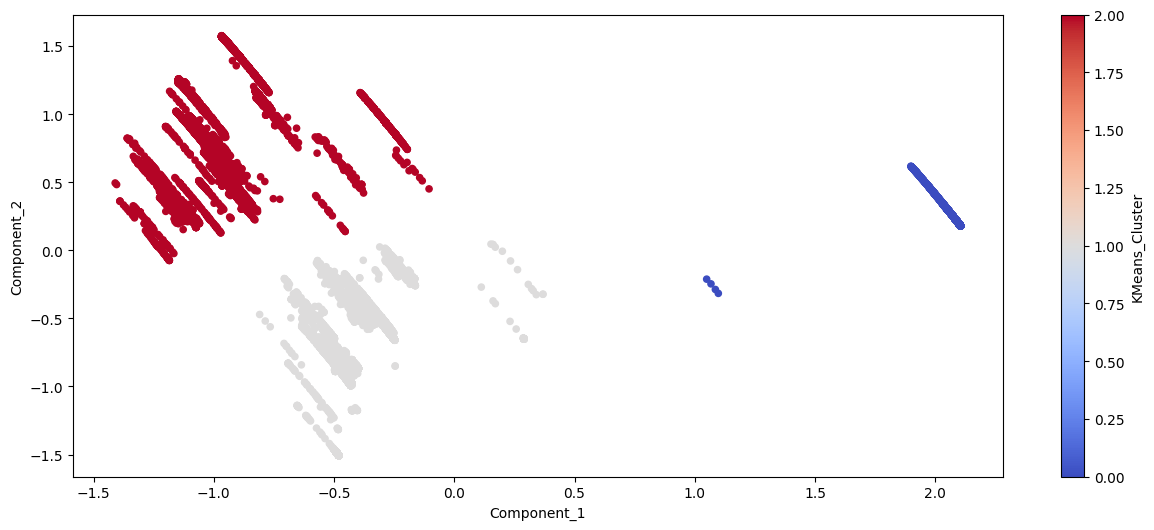

<matplotlib.axes._subplots.AxesSubplot at 0x7fec53ae5d60>

In [0]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [0]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)

Out[157]: